In [8]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("../data/creditcard.csv")

In [10]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

split_parameters = {
    'stratify': y,
    'test_size': 0.2,
    'random_state': 42
}

X_train, X_test, y_train, y_test = train_test_split(X, y, **split_parameters)

In [12]:
logreg_parameters = {
    'class_weight': 'balanced',
    'max_iter': 5000,
    'random_state': 42
}

logreg = LogisticRegression(**logreg_parameters)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(**logreg_parameters))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

y_proba

array([0.00569098, 0.06755242, 0.00011903, ..., 0.00026008, 0.00375493,
       0.08229136], shape=(56962,))

In [18]:
def test_threshold(y_proba, y_test, threshold=0.5):
    y_pred = np.where(y_proba > threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    test_threshold(y_proba, y_test, threshold)

Threshold: 0.1
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     56864
           1       0.01      0.95      0.02        98

    accuracy                           0.80     56962
   macro avg       0.50      0.87      0.45     56962
weighted avg       1.00      0.80      0.89     56962

Confusion Matrix:
 [[45549 11315]
 [    5    93]]

ROC AUC Score: 0.9720834996210077
Threshold: 0.2
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.94      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.90      0.95     56962

Confusion Matrix:
 [[51349  5515]
 [    6    92]]

ROC AUC Score: 0.9720834996210077
Threshold: 0.3
Classification Report:
               precision    recall  f1-score   support

    

In [17]:
y_proba_custom = (y_proba >= 0.9).astype(int)
print("Custom Threshold Classification Report:\n", classification_report(y_test, y_proba_custom))
print("Custom Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_proba_custom))
print("\nCustom Threshold ROC AUC Score:", roc_auc_score(y_test, y_proba_custom))

Custom Threshold Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.89      0.39        98

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962

Custom Threshold Confusion Matrix:
 [[56599   265]
 [   11    87]]

Custom Threshold ROC AUC Score: 0.9415474300299749


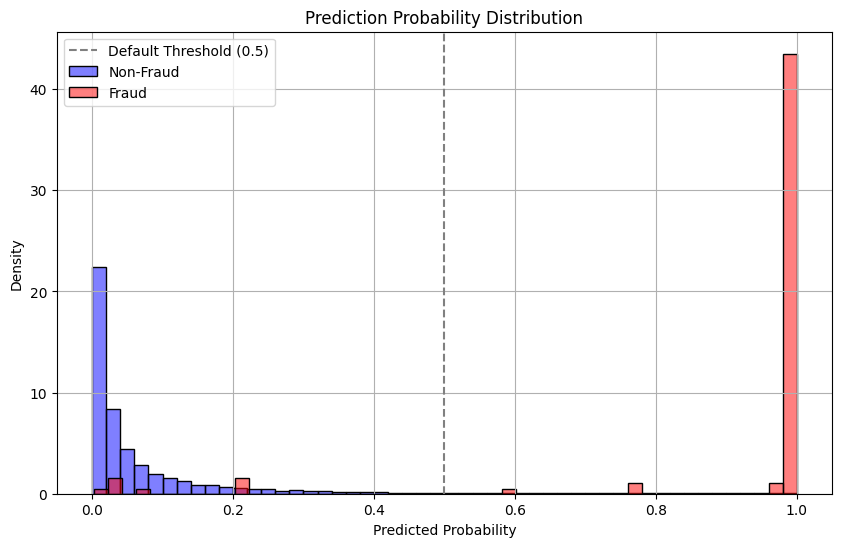

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for the positive class (fraud)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Separate probabilities by true class
fraud_probs = y_proba[y_test == 1]
nonfraud_probs = y_proba[y_test == 0]

# Plot histograms
plt.figure(figsize=(10, 6))
sns.histplot(nonfraud_probs, color='blue', label='Non-Fraud', stat='density', bins=50, alpha=0.5)
sns.histplot(fraud_probs, color='red', label='Fraud', stat='density', bins=50, alpha=0.5)

plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Prediction Probability Distribution')
plt.legend()
plt.grid(True)
plt.show()
